# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [110]:
#importo las librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [111]:
#cargo el archivo json en un dataframe
df=pd.read_json("https://github.com/restrepo/anomaly/raw/main/solutions.json.gz")

#muestro el dataframe original
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [112]:
#creo una lista vacia donde almacenaré los valores absolutos de la columna solution
l=[]

#saco los valores absolutos de la columna solution
for i in range (0,len(df["solution"])):
  #añado a la lista solo el mayor valor absoluto de cada fila
  l.append(np.max(np.abs(df["solution"][i])))

#creo una columna en el dataframe que contiene los valores absolutos
df["smax"]=l

#muestro el resultado
df

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


In [113]:
#creo una lista que almacenara las sumas
s=[]

#recorro todas las filas de la columna 
for i in range(0,len(df["solution"])):
  #hallo la suma de cada fila y la agrego a s
  s.append(np.sum(df["solution"][i]))

#agrego al dataframe una columna con la suma
df["sum_s"]=s

#agrego al dataframe el cubo de la suma, tuve que convertir s a un arreglo de numpy para aprovechar el operador de potencia
df["sum_s3"]=np.array(s)**3

#muestro el dataframe con las dos columnas nuevas
df

,l,k,solution,gcd,n,smax,sum_s,sum_s3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


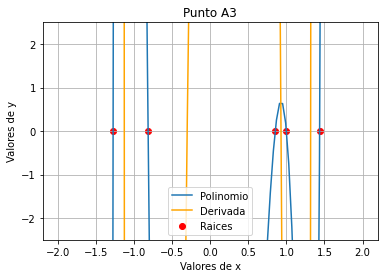

In [114]:
#creo la semilla con mi numero de cedula
np.random.seed(1000409483)

#genero el entero entre 0 y 390073, a la funcion le dije que el maximo es 390074 porque solo tiene en cuenta hasta el numero anterior a ese
rand=np.random.randint(0,390074)

#creo una variable con los coeficientes
coef=df["solution"][rand]

#genero un polinomio con los coeficientes pedidos
poly=np.poly1d(coef)

#encuentro las raices del polinomio
roots=np.roots(coef)

#determino cuales de esas raices son reales y las guardo en una lista
rootsreal=[]
for i in roots:
  if i.real==i:
    rootsreal.append(i.real)

#convierto la lista en arreglo de numpy
rootsreal=np.array(rootsreal)

#derivo el polinomio
derypoly=np.polyder(poly)

#genero un linspace de x, observando la lista de reales, vi que todas las raices estan en el intervalo (-2,2)
x=np.linspace(-2,2,100)

#grafico el polinomio, las raices y la derivada del polinomio
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,poly(x),label="Polinomio")
ax.scatter(rootsreal,poly(rootsreal),color="red",label="Raices")
ax.plot(x,derypoly(x),color="orange",label="Derivada")
ax.set(title="Punto A3",xlabel="Valores de x", ylabel="Valores de y",ylim=(-2.5,2.5))
ax.grid()
ax.legend()
plt.show()

B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

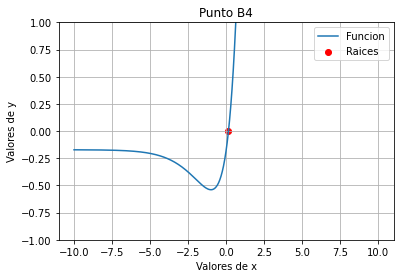

In [116]:
#genero la semilla con mi numero de cedula
np.random.seed(1000409483)

#genero un entero para seleccionar el problema, observando el numero generado vi que debia usar el problema 1
rand=np.random.randint(1,6)

#genero un numero aleatorio en el intervalo [0,1)
p=np.random.random()

#defino la funcion restandole p, encontrar el valor de x que satisface la ecuacion 1 equivale a encontrar la raiz de esta funcion
f=lambda x:x*np.e**x-p

#genero un linspace de x como se indica
x=np.linspace(-10,10,500)

#creo un arreglo que almacena f(x)
fx=f(x)

#creo una lista que almacenara los cambios de signo de f(x)
changes=[]

#esta rutina deteca los cambios de signo de f(x)
for i in range(1,len(fx),1):
  l=[]
  if fx[i]*fx[i-1]<0: #determino si hay cambio de signo
  #agrego a la lista los valores en que se da un cambio
    l.append(x[i-1]) 
    l.append(x[i])
  if l!=[]: #si no hay cambios, la lista queda vacia, para evitar agregarla, agrego esta condicion
    changes.append(l)

#genero una lista que contiene las raices encontradas
raices=[]

#busco una raiz en cada cambio de signo con el metodo de la biseccion
for i in range(0,len(changes)):
  raices.append(scipy.optimize.bisect(f,changes[i][0],changes[i][1],xtol=1e-9,maxiter=500))

#convierto aa arreglo de numpy la lista con las raices
raices=np.array(raices)

#grafico lo pedido
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,fx,label="Funcion")
ax.scatter(raices,f(raices),label="Raices",Color="red")
ax.set(title="Punto B4",xlabel="Valores de x", ylabel="Valores de y",ylim=(-1,1))
ax.grid()
ax.legend()
plt.show()